# # Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.

Adapted from http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [1]:
print(__doc__)

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
# Explore the keys
diabetes.keys()

dict_keys(['data', 'DESCR', 'target', 'feature_names'])

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
# Data size
diabetes.data.shape

(442, 10)

In [7]:
diabetes.target.shape

(442,)

In [8]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [9]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [10]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

diabetes_X_train.shape, diabetes_X_test.shape, diabetes_y_train.shape, diabetes_y_test.shape

((422, 1), (20, 1), (422,), (20,))

In [11]:
# Split the data using train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test =  train_test_split(diabetes_X, diabetes.target, test_size=0.045, random_state=0)

diabetes_X_train.shape, diabetes_X_test.shape, diabetes_y_train.shape, diabetes_y_test.shape

((422, 1), (20, 1), (422,), (20,))

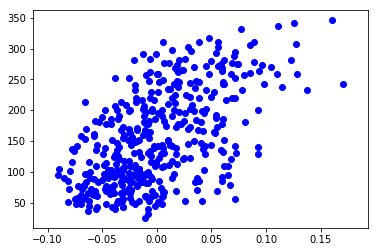

In [12]:
# Plot train
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.show()

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [14]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [16]:
#diabetes_y_pred

In [17]:
#diabetes_y_test

In [18]:
# The coefficients
print('Estimated intercept: ', regr.intercept_)

# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Estimated intercept:  152.253755482
Coefficients:  [ 953.29606338]
Mean squared error: 3376.74


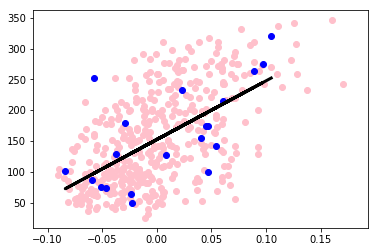

In [19]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='pink')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='black', linewidth=3)

plt.show()